# Module 1.1 Distributions and Random Processes

## 1.1.2 Distributions

Many real world phenomena can be modelled with random variables, which is useful when we do not have all possible information about a given environment. Consider a die roll, where throw a die into the air, and see which # is on top.

The die has six possible outcomes: 1, 2, 3, 4, 5 and 6, which are the possible states or values. Based on the parameters, it is impossible to get a value other than these distinct possibilities.

The below Python code simulates a die roll:

In [1]:
import random

possible_states = [1, 2, 3, 4, 5, 6]

random.choice(possible_states)

2

If we run this simulation 100,000 times, we can get an `empirical estimate` of the distribution:

In [2]:
NUM_TRIALS = 100000

results = [random.choice(possible_states) for i in range(NUM_TRIALS)]

Then can use the Counter function to count all instances of each of the outcomes:

In [3]:
from collections import Counter
counts = Counter(results)
counts


Counter({1: 16594, 4: 16850, 5: 16504, 6: 16891, 2: 16515, 3: 16646})

## convert to a dataframe and visualize with altair

In [5]:
import altair as alt
#import vega
alt.renderers.enable('default') # setup the environment to show altair plots

RendererRegistry.enable('default')

In [7]:
import pandas as pd

die_rolls = pd.DataFrame({
    'state': possible_states,
    'count': [counts.get(state, 0) for state in possible_states]
})

die_rolls

,state,count
0,1,16594
1,2,16515
2,3,16646
3,4,16850
4,5,16504
5,6,16891


In [8]:
alt.Chart(die_rolls).mark_bar().encode(
    x='state:O',
    y='count')

alt.Chart(...)

As can be expected with a 'fair' die roll, the estimates are about the same.

More formally, there is a random variable X such that the value of X is the result of rolling afair die. The distribution of X is the following (paraphrasing): the probability of the outcome of the die roll for each state is n/6 where n is a range from 1 to 6, inclusive.

In this case, all valid options have the same likelihood of appearing, and the resulting distribution is known as a `uniform distribution`. Uniform distributions can occur for both discrete and continuous variables.

A **discrete** variable is one that takes on a fixed set of values, such as a die roll or the month a person was born. They are usually finite (i.e. there is only so many of them), but the requirement is that technically they are *countable*, which allows for infinite discrete values (think of the integer as a discrete infinite random variable)

A **continuous** variable is one that can take on an arbitrary value. As an example, the amount of liquid in a cup is continuous. It can be 350 mL, of 350.1 mL, or 350.1252342 mL, (and so on) with infinite precision.

Distributions exist for both discrete random variables, as seen above, and for continuous random variables, but they often behave differently

## Normal Distributions

Let's create a normal distribution, which is a continuous distribution centered around 0 with a standard deviation of 1.


A normal distribution is the most commonly seen continuous distribution, and the one most are familiar with.

In [11]:
# plotting out a normal distribution

import numpy as np
x = np.linspace(-5, 5, 1000) # 1,000 linearly spaced points starting from -5 and to 5

mean = 0
sigma = 1

y = (1 / np.sqrt(2 * np.pi * sigma **2)) * np.e ** -((x - mean) **2) / (2 * sigma **2)

# or a bit more nicely laid out:

scale_term = (1 / np.sqrt(2 * np.pi * sigma **2))
exponent_term = ((x-mean) ** 2) / (2 * sigma **2)
y = scale_term * np.e ** -exponent_term


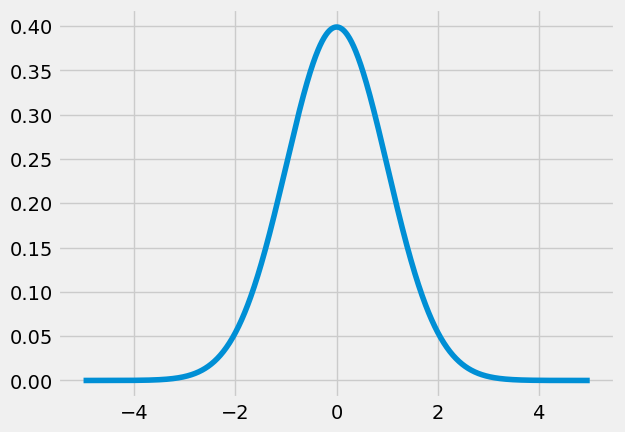

In [15]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(x, y, '-')
plt.show()

In [16]:
from scipy import stats

In [17]:
n = stats.norm(0,1)

In [18]:
# generate 10 random variates from this distribution
n.rvs(10)

array([ 1.05770406, -1.28645245,  0.10459799,  2.00280984,  0.73692691,
        1.07770546,  0.39263979, -0.7701517 ,  1.00398829, -0.41886471])

In [20]:
results = n.rvs(10)
Counter(results) # note that Counter is not very useful here
                 # instead Histograms work better

Counter({-0.10796924673261607: 1,
         -0.26613183084279546: 1,
         0.0998801458089965: 1,
         -0.04564616074115993: 1,
         0.4629940096286066: 1,
         0.7392729164029884: 1,
         0.3660844067583949: 1,
         0.08402057176508776: 1,
         -0.7675140726390923: 1,
         0.6223623719996478: 1})

In [22]:
normal_values = pd.DataFrame({'value': n.rvs(5000)})

alt.Chart(normal_values).mark_bar().encode(
    alt.X('value', bin=alt.Bin(maxbins=100)),
    y='count()',
    color=alt.value('#287E1E'))

alt.Chart(...)

The shape is the famous 'bell curve' of the normal distribution.
It's heavily centered around the mean (0) and the spread of data is indciated by the standard deviation.

## Exercises

1. Plot a histogram of the standard deviation with the following properties:
+ A. Mean of 1, std deviation of 7
+ B. Mean of 10, std deviation of 1
+ C. Mean of -10, std deviation of 5

In [23]:
x = np.linspace(-5, 5, 1000) # 1,000 linearly spaced points starting from -5 and to 5

scale_term = (1 / np.sqrt(2 * np.pi * sigma **2))
exponent_term = ((x-mean) ** 2) / (2 * sigma **2)
y = scale_term * np.e ** -exponent_term

In [25]:
#### setting the parameters

mean_A = 0
sigma_A = 7

scale_term_A = (1 / np.sqrt(2 * np.pi * sigma_A **2))
exponent_term_A = ((x-mean_A) ** 2) / (2 * sigma_A **2)
y_A = scale_term_A * np.e ** -exponent_term_A

##########

mean_B = 10
sigma_B = 1

scale_term_B = (1 / np.sqrt(2 * np.pi * sigma_B **2))
exponent_term_B = ((x-mean_B) ** 2) / (2 * sigma_B **2)
y_B = scale_term_B * np.e ** -exponent_term_B

#######

mean_C = -10
sigma_C = 5

scale_term_C = (1 / np.sqrt(2 * np.pi * sigma_C **2))
exponent_term_C = ((x-mean_C) ** 2) / (2 * sigma_C **2)
y_C = scale_term_C * np.e ** -exponent_term_C

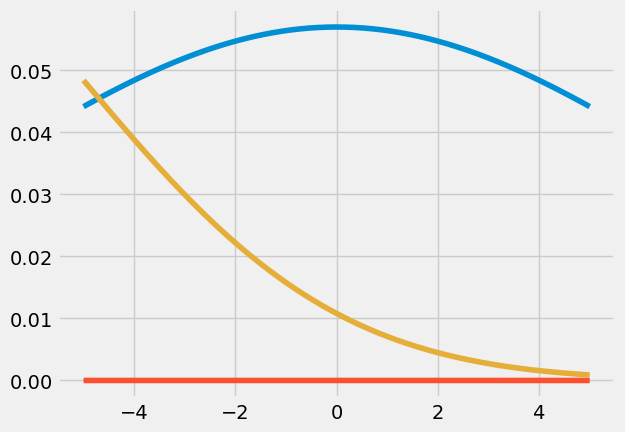

In [30]:
## plot
plt.plot(x, y_A)
plt.plot(x, y_B, '-')
plt.plot(x, y_C, '-')
plt.show()

In [33]:
## Answer
mean_std_list = [(1,7),(10,1),(-10,5)]

for vals in mean_std_list:
    norm_dist_func = stats.norm(vals[0], vals[1])
    results = norm_dist_func.rvs(1000)
    normal_values = pd.DataFrame({'value': results})
    norm_plot = alt.Chart(normal_values, title="Normal Distribution histogram with mean " + str(vals[0]) + " and standard deviation " + str(vals[1])).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),
    y='count()',)
    norm_plot.display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

2. Create a python function that accepts two inputs (`mean` and `standard deviation`), and plots the histogram

In [34]:
def display_norm(mean, std):
    norm_dist_func = stats.norm(mean, std)
    results = norm_dist_func.rvs(1000)
    normal_values = pd.DataFrame({'value': results})
    norm_plot = alt.Chart(normal_values, title="Normal Distribution histogram with mean " + str(vals[0]) + " and standard deviation " + str(vals[1])).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),
    y='count()',)
    norm_plot.display()
display_norm(1,2)

alt.Chart(...)

## Probability Density Functions

The histograms above are approximations of what is known as a `probability density function`, or `PDF`. A PDF shows the probability of a given value, for a discrete random variable.

For a continuous random varaible, any *exact* value has a probability